# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Across the world, most meetings beteen patients and health practicioners is usually done after scheduling an appointment. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Features of the patient are included in each row. The columns are:

- **PatientId:** Identification of a patient; unique to its owner.
- **AppointmentID:** Identification of an appointment
- **Gender:** Gender; either Male or Female
- **ScheduledDay:** Day appointment was made.
- **AppointmentDay:**  Day to visit the doctor.
- **Age:** Age of the patient.
- **Neighbourhood:** Area where the patient stays
- **Scholarship:** If the patient is a recipient of the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) social welfare program by the Government of Brazil.
- **Hipertension:** If the patient is hypertensive
- **Diabetes:** If the patient is diabetic.
- **Alcoholism:** If the patient is an alcoholic.
- **Handcap:** If the patient is physically challenged.
- **SMS_received:** If the patient got an SMS reminder before the Appointment Day
- **No-show:** If the patient showed up for the scheduled appointment or not. This is the most important feature in the dataset.

### Question(s) for Analysis

- What age of patients show up more for appointments and otherwise?
- What gender of patients show up more for appointments?
- Do scholarship beneficiaries tend to show up for appointments compared to those that are not beneficiaries?
- What is the gender distribution of scholarship recipients
- What days of the week are preferred by patients?
- Does SMS remnder affect patients' turn out?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
df=pd.read_csv('no_show_appointment.csv')  # loading data to notebook
df.head(1) # view first line of dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
# Before any serious work is done, Column names will be cleaned for better readability and code writing.

df.columns = df.columns.str.lower() #converts column names to all lower case


for name in df.columns: # For each column name,
    if 'id' in name:
        df.rename( columns={name : name[:-2] + '_' + name[-2:]}, inplace=True) # inserts underscore before 'id'
    elif 'day' in name:
        df.rename(columns={name : name[:-3] + '_' + name[-3:]}, inplace=True) # inserts underscore before 'day'
    elif name == 'hipertension':
        df.rename( columns= {name : 'hypertension'}, inplace=True) # corrects hypertension
    elif name == 'handcap':
        df.rename( columns= {name : 'handicapped'}, inplace=True) # corrects handicapped
    elif name == 'no-show':
        df.rename( columns= {name : 'showed_up'}, inplace=True) #changes '-' in no-show to '_'

In [4]:
df.shape # retuns rows and columns of dataframe

(110527, 14)

In [5]:
df.duplicated().sum()  # to check duplicates

0

In [6]:
df.describe() # summary statistics of dataframe

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.info() # quick information on dataframe columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicapped      110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  showed_up        110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.patient_id.nunique() # number of unique patient

62299

In [9]:
df.appointment_id.nunique() # number of unique apppointment IDs

110527

In [10]:
df.patient_id.duplicated().sum()   # number of duplicate patient IDs

48228

In [11]:
df.appointment_id.duplicated().sum()   # number of duplicate patient IDs

0

A look at the information on the dataset shows that:
1. it contains 110527 rows, and 14 columns;
2. there are no null values;
3. the **appointment_day** and **schedules_day** are in the wrong format; the format should be that of Date and Time, not string

```
type(df.scheduled_day[0])
----> str
```
4. **patient_id** has its values stored as float instead of string for easy grouping or sorting;
5. **Handicapped** has a maximum value of 4 which may seem impractical, as 1 *means* Yes and 0 *means* No across other feature columns. However, the curator stated [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) that the values stand for the number of diffrent disabilities a patient has.
6. There are no duplicated rows, but the number of rows (110527) is more than the amount of recorded patients (62299). This means patients_ids are duplicated in the dataset;
7. count of **appointment_id** equals total number of rows [110,527]. For this reason, the **appointment_id** can be dropped because the default index also has [110,527] unique values;
7. there is an outlier in the **age** column (-1). going back to the source, the curator said [it represents an unborn child](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/41457). This will be dropped because an unborn child does not fit in the description of the sampled data.
8. **showed_up** values need to be substituted for each other. i.e 'No' should replace 'Yes' and 'Yes' should replace 'No'


### Data Cleaning 

######  Date cleaning

In [12]:
# To correct the format of appointment_day and schedules_day

df['appointment_day']=pd.to_datetime(df['appointment_day'])
df['scheduled_day'] =pd.to_datetime(df['scheduled_day'])
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [13]:
type(df.appointment_day[0])

pandas._libs.tslibs.timestamps.Timestamp

The format of the date columns has now been corrected.

######  ID cleaning

In [14]:
# drop the appointment id so duplicate rows can be gotten.
df.drop('appointment_id', axis=1, inplace=True)

In [15]:
# cleaning the patient id column
df.patient_id=df.patient_id.astype('str').str[:-2]
type(df.patient_id[0])

str

In [16]:
print(df.duplicated().sum())   # number of duplicate rows
df.sort_values('patient_id').head(10)

618


,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up
84473,11111462625267,F,2016-05-18 14:58:29+00:00,2016-06-08 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,1,No
51059,111124532532143,M,2016-03-31 09:17:26+00:00,2016-05-03 00:00:00+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,No
95359,111124532532143,M,2016-04-26 15:05:58+00:00,2016-06-01 00:00:00+00:00,9,MARIA ORTIZ,0,0,0,0,0,1,Yes
60744,11114485119737,F,2016-04-26 10:46:38+00:00,2016-05-25 00:00:00+00:00,12,MARIA ORTIZ,0,0,0,0,0,1,Yes
2321,11116239871275,F,2016-04-27 07:05:38+00:00,2016-04-29 00:00:00+00:00,13,SÃO PEDRO,0,0,0,0,0,0,No
34823,1111633122891,M,2016-05-11 08:45:03+00:00,2016-05-11 00:00:00+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,No
17494,1111633122891,M,2016-05-18 09:37:39+00:00,2016-05-18 00:00:00+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,No
28351,1111633122891,M,2016-05-09 11:03:50+00:00,2016-05-09 00:00:00+00:00,2,SÃO JOSÉ,0,0,0,0,0,0,No
49269,11118512139,F,2016-05-02 18:28:46+00:00,2016-05-31 00:00:00+00:00,33,JARDIM DA PENHA,0,0,0,0,0,1,No
108378,1111852391322,M,2016-06-02 07:16:05+00:00,2016-06-07 00:00:00+00:00,41,ROMÃO,0,0,0,0,0,1,No


As expected, there are [618] duplicate rows in the dataset.We were able to get this because the unique appointment column has been dropped. Looking at the first 20 rows sorted by patient id, we see that 2 patients made multiple appointments; this occurs across the dataset. This shouldn't be interpreted as 'duplicates'. Now, we drop the actual 618 duplicates; rows with the same values all through, leaving the first occurence.

In [17]:
df.drop_duplicates(inplace=True) # drop the duplicates rows
df.duplicated().sum() # confirm dropped duplicates

0

######  Age cleaning

In [18]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000
mean,37.086472,0.098281,0.197236,0.071814,0.030425,0.022127,0.322831
std,23.121491,0.297696,0.397914,0.258181,0.171755,0.160866,0.467561
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df[df.age < 0]  # subsetting the negative age

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up
99832,465943158731293,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


The outlier in the column for age appears once we can drop it as it's inconslusive.

In [20]:
df.drop(index=99832,inplace=True) # dropping the negative age from the dataframe
df[df.age < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up


In [21]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000,109908.000000
mean,37.086818,0.098282,0.197238,0.071815,0.030425,0.022128,0.322834
std,23.121310,0.297697,0.397915,0.258182,0.171756,0.160867,0.467562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


######  Showed up status cleaning

In [22]:
df.showed_up=df.showed_up.replace(['No','Yes'], ['Yes', 'No']) # change values of showed_uo column for easier understanding

######  Dropping duplicates

In [23]:
print(df.duplicated().sum()) # to check duplicate across dataset
df.head()

0


,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [24]:
df[['patient_id', 'scheduled_day']].duplicated().sum() # duplicates by scheduled day and time entries for a patient

716

In [25]:
df.drop_duplicates(['patient_id', 'scheduled_day'], inplace=True) # drop duplicates of scheduling day entries for a patient
df[['patient_id', 'scheduled_day']].duplicated().sum()

0

This was done before removing the time stamp from the date values. It's not practical for a unique patient to have duplicate entries for schedule **time** in a day.

In [26]:
df['appointment_day_copy']=df['appointment_day'].copy()  # this will be used later to get the days of the week.

In [27]:
df['scheduled_day']=df['scheduled_day'].dt.date # removing time values in the date values so duplicates can be checked across
df['appointment_day']=df['appointment_day'].dt.date
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up,appointment_day_copy
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29 00:00:00+00:00


In [28]:
df.duplicated().sum()  # to check amount of duplicates rows

3603

In [29]:
df.drop_duplicates(inplace=True)    # drop the duplicate rows
print(str("We're left with {r} rows and {c} columns").format(r=df.shape[0], c=df.shape[1]))
df.head(3)

We're left with 105589 rows and 14 columns


,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up,appointment_day_copy
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29 00:00:00+00:00
1,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29 00:00:00+00:00
2,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29 00:00:00+00:00


In [30]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received
count,105589.000000,105589.000000,105589.000000,105589.000000,105589.000000,105589.000000,105589.000000
mean,37.127788,0.098012,0.199112,0.072801,0.028043,0.021963,0.333813
std,23.193601,0.297332,0.399334,0.259811,0.165096,0.160562,0.471576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [31]:
df_showed = df.query('showed_up == "Yes"')  # create new dataset for people that showed up
df_no_show = df.query('showed_up == "No"')  # create new dataset for people that did not show up

df_unique = df.copy()       # create new dataset for patients' fixed attributes; age, gender, location and scholarship status
df_unique.drop_duplicates(subset='patient_id', inplace=True)
print(str('We have {} unique patients').format(df_unique.shape[0]))

We have 62298 unique patients


In [32]:
sns.set_theme(style='darkgrid')           # sets the style for the visuals

###  Checking the distribuion of the data.

In [33]:
#define functions for top value counts

def top_freq(col):
    '''Retuns top 4 values of columns in a dataframe'''
    col_name= print(col, '\n')
    top= print(df[col].value_counts().head(4))
    line= print('--' * 20)
    return col_name,top,line

def top_freq_unique(col):
    '''Retuns top 4 values of columns in a dataframe'''
    col_name= print(col, '\n')
    top_uniq= print(df_unique[col].value_counts().head(4))
    line= print('--' * 20)
    return col_name,top_uniq,line

In [34]:
for col in df_unique[['age', 'gender', 'neighbourhood', 'scholarship']]: # distribuiton of patients' fixed attributes
    top_freq_unique(col)

age 

0    2073
1    1443
2    1074
3     966
Name: age, dtype: int64
----------------------------------------
gender 

F    40045
M    22253
Name: gender, dtype: int64
----------------------------------------
neighbourhood 

JARDIM CAMBURI     4192
MARIA ORTIZ        3336
JARDIM DA PENHA    2406
RESISTÊNCIA        2373
Name: neighbourhood, dtype: int64
----------------------------------------
scholarship 

0    56510
1     5788
Name: scholarship, dtype: int64
----------------------------------------


From this, we see that:
- majority of the sampled population are aged 0 to 3
- females are almost as twice much as males
- Most of the patients stay in Jardim Camburi
- 5788 of the 62988 (9%) are scholarship recipients 

In [35]:
for col in df.columns:     # distribution of all features for all appointments
    top_freq(col)

patient_id 

1484143378533      35
871374938638855    33
822145925426128    31
75797461494159     30
Name: patient_id, dtype: int64
----------------------------------------
gender 

F    69133
M    36456
Name: gender, dtype: int64
----------------------------------------
scheduled_day 

2016-05-03    4070
2016-05-02    4004
2016-05-05    3952
2016-05-16    3951
Name: scheduled_day, dtype: int64
----------------------------------------
appointment_day 

2016-06-06    4509
2016-05-16    4366
2016-05-30    4320
2016-05-11    4316
Name: appointment_day, dtype: int64
----------------------------------------
age 

0     3442
1     2206
52    1634
53    1592
Name: age, dtype: int64
----------------------------------------
neighbourhood 

JARDIM CAMBURI     7302
MARIA ORTIZ        5605
RESISTÊNCIA        4171
JARDIM DA PENHA    3713
Name: neighbourhood, dtype: int64
----------------------------------------
scholarship 

0    95240
1    10349
Name: scholarship, dtype: int64
--------------------

###### Visual distribution

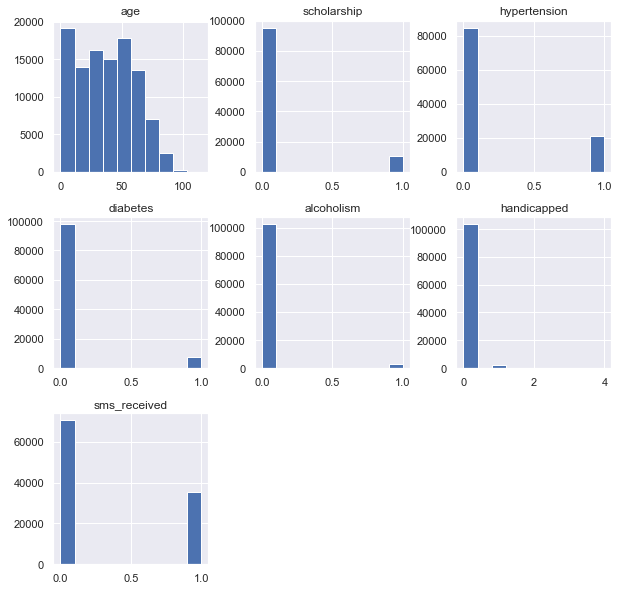

In [36]:
# histrogram of features for patients for each appointment date
df.hist(['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism' ,'handicapped', 'sms_received'],figsize=(10,10));

From the distribution above, we see that for patients that book appointments:
- majority are 50 years old or younger
- a small percent of the are recipient of the scholarship (95240 against 10349)
- they are generally 'Healthy'. Hypertension however is a cause for concern; a towering count of 21,024 booked appointments are by hypertensive patients
- about 7 in 20 got SMS reminders before their appointment dates
- the most preferred appointment date is 2016-06-06.

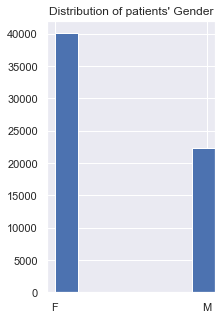

In [37]:
plt.title('Distribution of patients\' Gender') # histogram of gender
df_unique['gender'].hist(figsize=(3,5), width=(.15));

The number of females in the dataset is almost as twice as that of males

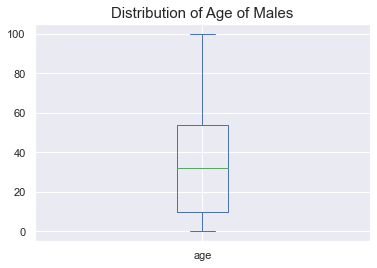

In [38]:
df_unique[df_unique['gender']=='M'].age.plot(kind= 'box')  # distribution of male patients age
plt.title('Distribution of Age of Males', fontsize=15);

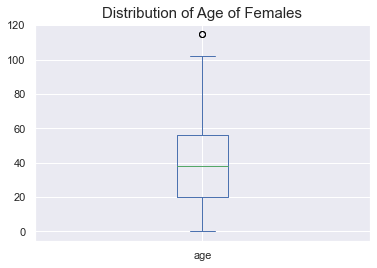

In [39]:
df_unique[df_unique['gender']=='F'].age.plot(kind= 'box')  # distribution of female patients age
plt.title('Distribution of Age of Females', fontsize=15);

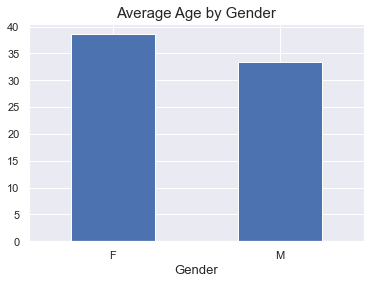

In [40]:
df_unique.groupby('gender').age.mean().plot(kind= 'bar')  # distribution of average age by gender
plt.xticks(rotation = 0)
plt.xlabel('Gender', fontsize=13)
plt.title('Average Age by Gender', fontsize=15);

The average age for females is approximately 40, while that of males is 33. Some females are above 100 years old.

### Research Question 1
#### What age of patients show up more for appointments and otherwise?

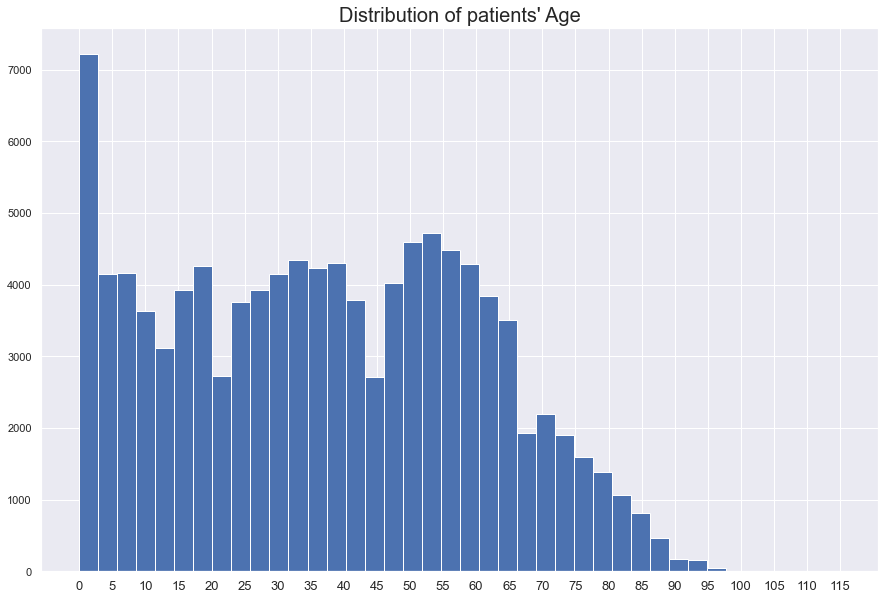

In [41]:
plt.title('Distribution of patients\' Age', fontsize=20)
plt.xticks(np.arange(min(df.age), max(df.age)+1, step=5.0), fontsize=13)  # (includes start, excludes stop, steps)
df.age.hist(bins=40, figsize=(15,10));

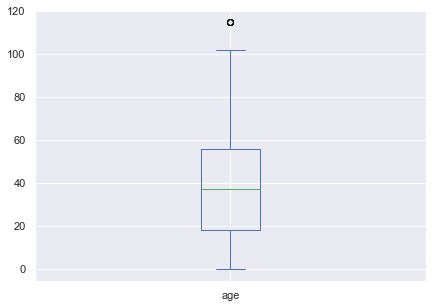

In [42]:
df.age.plot(kind='box', figsize=(7,5));    # for linear spread of data points of patients' age

In [43]:
df.age.describe(), df.age.value_counts().head(10)

(count    105589.000000
 mean         37.127788
 std          23.193601
 min           0.000000
 25%          18.000000
 50%          37.000000
 75%          56.000000
 max         115.000000
 Name: age, dtype: float64,
 0     3442
 1     2206
 52    1634
 53    1592
 56    1587
 2     1575
 49    1547
 50    1543
 57    1542
 38    1511
 Name: age, dtype: int64)

The average age of patients is 37 years, with a high percentage of patients being some days to a year old. one outlier is that of the 115 old patient as shown in the box plot.

#### Age distribution of patients that either showed up or not.

84142 patients showed up for their appointments, and this is the top 5 

Age	 freq
 0     2816
1     1796
52    1343
56    1333
2     1327
Name: age, dtype: int64


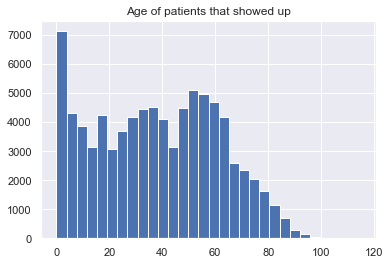

In [44]:
print(str('{a} patients showed up for their appointments, and this is the top 5 \n').format(a=df_showed.shape[0]))
print('Age\t freq\n',df_showed.age.value_counts().sort_values(ascending=False).head()) # top 5 ages of patients that showed up
df_showed['age'].hist(bins=30)
plt.title('Age of patients that showed up');

21447 persons did not show for their appointments and ths is the top 7 

Age	 freq
 0     626
1     410
19    377
17    376
21    348
30    347
20    347
Name: age, dtype: int64


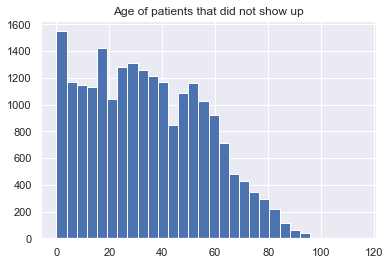

In [45]:
print(str('{a} persons did not show for their appointments and ths is the top 7 \n').format(a=df_no_show.shape[0]))
print('Age\t freq\n',df_no_show.age.value_counts().sort_values(ascending=False).head(7)) # top 5 ages of patients that did not show up
df_no_show['age'].hist(bins=30)
plt.title('Age of patients that did not show up');

In [46]:
df.age.nunique()

103

In [47]:
((df[df['age'] <=2].value_counts().sum())/df.shape[0] * 100).round(2)   # percentage of patients between 0 to 3 years

6.84

### Research Question 2
#### What gender of patients show up more for appointments?

Total females = 69133, while total males = 36456


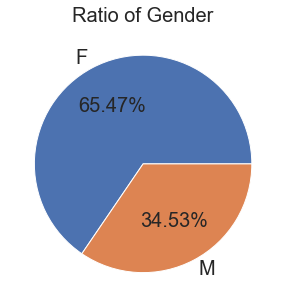

In [48]:
print(str('Total females = {a}, while total males = {b}')
      .format(a=df[df['gender']=='F'].value_counts().sum(), b=df[df['gender']=='M'].value_counts().sum()))
df['gender'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=20, autopct='%.2f%%');
plt.ylabel('');
plt.title('Ratio of Gender', fontsize=20);

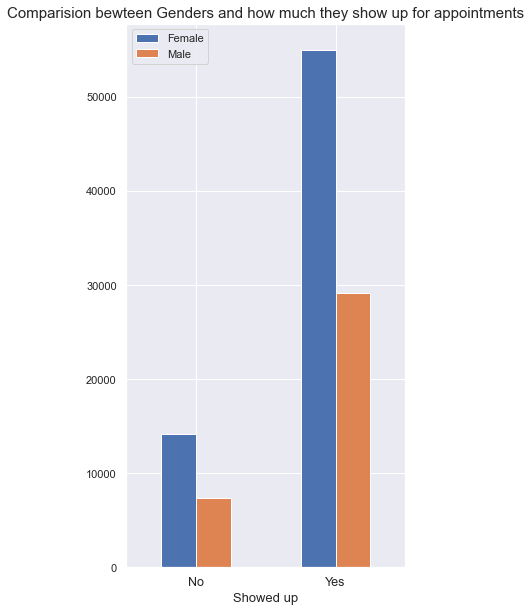

In [49]:
df.groupby('gender')['showed_up'].value_counts().unstack('gender').plot(kind='bar', figsize=(5,10));
plt.legend(['Female','Male'])
plt.title('Comparision bewteen Genders and how much they show up for appointments', fontsize=15)
plt.xlabel('Showed up', fontsize=13)
plt.xticks(rotation=0, fontsize=12.5);

The above visual shows that females generally show up for their scheduled appointments compared to males. We cannot conclude that this is an accurate statistic on the gender that goes for appointments or not; it is a biased result. This is because the number of females in the population is almost twice that of males. The soluion to this is to normalise the data.

In [50]:
gender_proportion=df.groupby('gender')['showed_up'].value_counts(normalize=True)

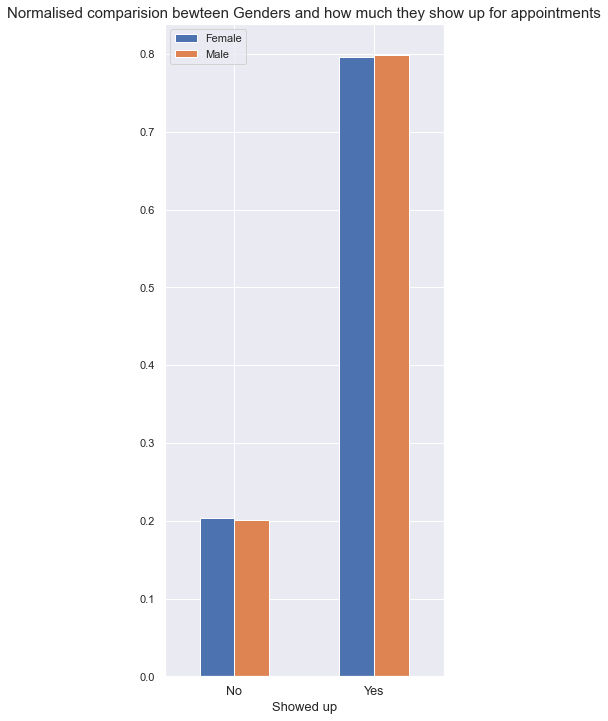

In [51]:
gender_proportion.unstack('gender').plot(kind='bar', figsize=(5,12));
plt.legend(['Female','Male'])
plt.title('Normalised comparision bewteen Genders and how much they show up for appointments', fontsize=15)
plt.xlabel('Showed up', fontsize=13)
plt.xticks(rotation=0, fontsize=12.5);

The normalised visual shows that when compared, patients generally show up for appointmets irrespective of their gender.

### Research Question 3
#### Do scholarship beneficiaries tend to show up for appointments compared to those that are not beneficiaries?

In [52]:
sch_df = df.query('scholarship == 1').drop_duplicates('patient_id')
no_sch_df = df.query('scholarship == 0').drop_duplicates('patient_id')

In [53]:
df.groupby('scholarship')['showed_up'].value_counts(normalize=True)

scholarship  showed_up
0            Yes          0.800682
             No           0.199318
1            Yes          0.761909
             No           0.238091
Name: showed_up, dtype: float64

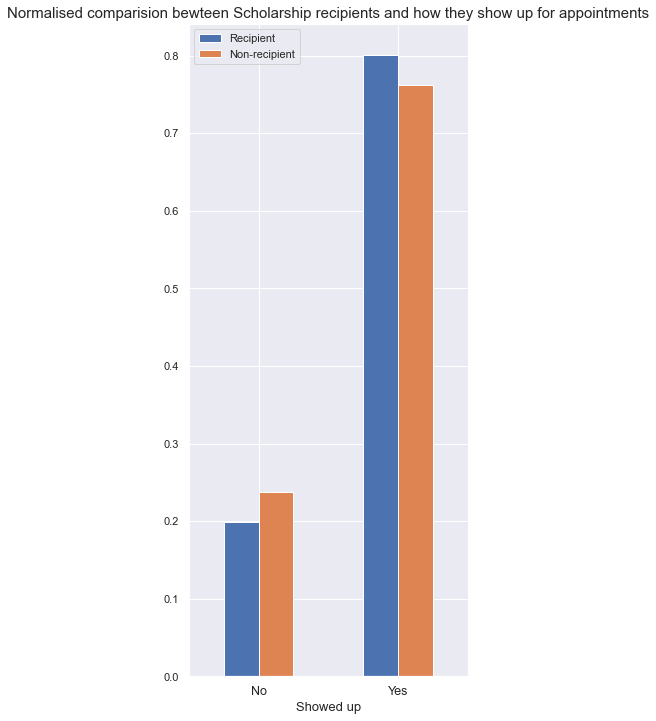

In [54]:
scho_prop=df.groupby('scholarship')['showed_up'].value_counts(normalize=True)
scho_prop.unstack('scholarship').plot(kind='bar', figsize=(5,12));
plt.legend(['Recipient','Non-recipient'])
plt.title('Normalised comparision bewteen Scholarship recipients and how they show up for appointments', fontsize=15)
plt.xlabel('Showed up', fontsize=13)
plt.xticks(rotation=0, fontsize=12.5);

Compared to their counterparts, scholarship recipients tend to show up for appointments. Also, non-recipients tend to NOT show up compared to recipients.

### Research Question 4
### What is the gender distribution of scholarship recipients

In [55]:
male_recip=sch_df[sch_df['gender']=='M'].drop_duplicates(subset='patient_id').value_counts().sum()
total_male=df[df['gender']=='M'].drop_duplicates(subset='patient_id').value_counts().sum()
proportion_of_male_recip= male_recip/total_male

In [56]:
female_recip=sch_df[sch_df['gender']=='F'].drop_duplicates(subset='patient_id').value_counts().sum()
total_female=df[df['gender']=='F'].drop_duplicates(subset='patient_id').value_counts().sum()
proportion_of_female_recip= female_recip/total_female

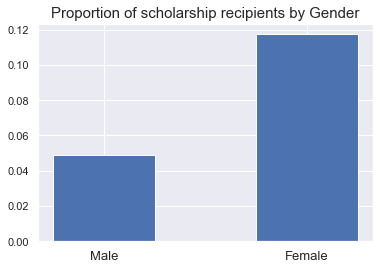

In [57]:
plt.bar(x=['Male','Female'],height=[proportion_of_male_recip, proportion_of_female_recip],
       width=0.5);
plt.xticks(fontsize=13)
plt.title('Proportion of scholarship recipients by Gender', fontsize=15)
plt.xlabel('');

Females tend to be recipients of the scholarship more than males.

### Research Question 5
#### What days of the week are preferred by patients?


First, we will create a new column for Days of the week.

In [58]:
df['week_day']=df['appointment_day_copy'].dt.day_name()
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,showed_up,appointment_day_copy,week_day
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29 00:00:00+00:00,Friday


In [59]:
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']  
# list of days occuring in the dataset. this is needed to order the bars of the bar chart

In [60]:
category_type = CategoricalDtype(categories=days, ordered=True) # setting the order of the bars
df['week_day'] = df['week_day'].astype(category_type)

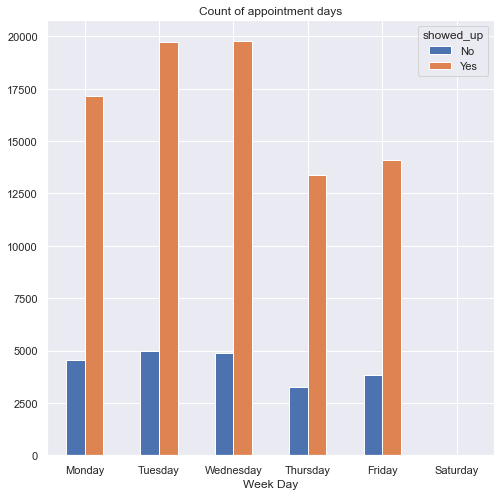

In [61]:
day_grp=df.groupby('week_day')['showed_up'].value_counts().unstack('showed_up')
day_grp.plot(kind='bar', rot=0, figsize=(8,8))
plt.xlabel('Week Day')
plt.title('Count of appointment days');

Tuesdays and Wednesdays are the most preferred days by patients.

### Research Question 6
#### Does SMS remnder affect patients' turn out?

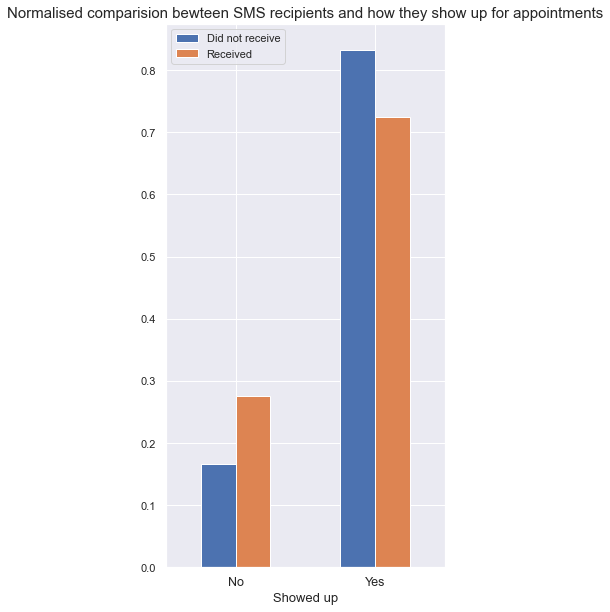

In [62]:
sms_prop=df.groupby('sms_received')['showed_up'].value_counts(normalize=True)
sms_prop.unstack('sms_received').plot(kind='bar', figsize=(5,10));
plt.legend(['Did not receive','Received'])
plt.title('Normalised comparision bewteen SMS recipients and how they show up for appointments', fontsize=15)
plt.xlabel('Showed up', fontsize=13)
plt.xticks(rotation=0, fontsize=12.5);

In [63]:
sms_prop  #proportion of patients that got SMS reminders and their show up status

sms_received  showed_up
0             Yes          0.833201
              No           0.166799
1             Yes          0.724402
              No           0.275598
Name: showed_up, dtype: float64

There's a notable effect by the SMS reminders. Patients that received a SMS were less likely to show up for their appointment than patients that didn't receive. This is a similar case for those that did not show up too; majority of them received a SMS reninder.

<a id='conclusions'></a>
## Conclusions
- The distribution of the gender in the dataset is highly skewed towards the female gender. Because of this, calculations around gender needed to be normalised for unbiased results.
- Majority of the patients that showed up or not are those between aged 0 and 2. This is because that age bracket take a high percent of the population (6.84% for 3 data points of 103 unique ages). But interestingly, adults in their fifties and early sixties are more inclined to show up for their appointment, while young adults between age 17 to 30 are more inclined to not show up for their appointment.
- For ages that are outliers, only the negative age was droped. The patients aged above 100 had heir records kept.
- Both males and females show similar tendency to show up for their appointments.
- The scholarship recipients value the scholarship. 8 in 10 tend to show up for their appointments. when compared to that of non recipients, it is slightly better.
- Females tend to be beneficiaries of the scholarship than guys.
- SMS reminders did not really fulfill their's purpose. Of 100 patients that did not receive a SMS, 83 showed up for their appointments, while for 100 that got reminders, only 72 showed up.
- Patients prefer Tuesdays and Wednesdays for their appointments. weekends are usually free.
- Hypertension seem rife among the sample. Steps should be taken to reduce the rate at which patients become hypertensive.

---------------------------------------------------------------------------------------------------------------------------
##### Limitations

Limitations faced include the imbalance of gender across the dataset, few outliers in the patients age and criteria for SMS reminder.

-----------------
These results can be extrapolated to all the population. Also, more analysis that can be done with this data include correlation between neighborhood and amount of diseases, population count of neighborhoods, relationship between diseases like alcoholism and diabetes.

> I used Stack Overflow for some codes